# **MALL CUSTOMER CLUSTERING**

In [23]:
import numpy as np # linear algebra
import pandas as pd 
from sklearn.metrics import silhouette_score
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# **DATA DESCRIPTION**

In [2]:
import matplotlib.pyplot as plt
dataset = pd.read_csv('/kaggle/input/mall-dataset/Mall_Customers.csv')
dataset.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Genre                   200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Genre'] = le.fit_transform(dataset['Genre'])
X = dataset.iloc[:,[3,4]].values
y=dataset['Genre']

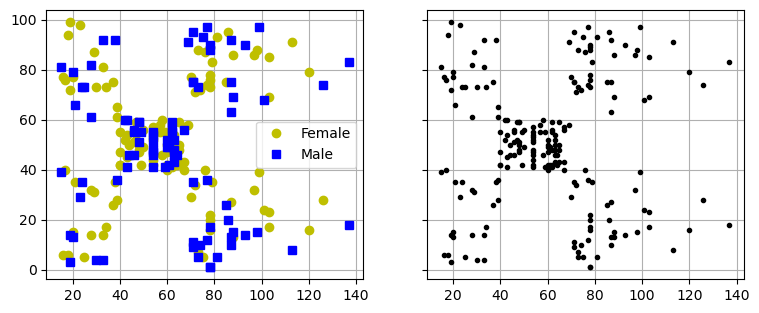

In [5]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 0], X[y==0, 1], "yo",label='Female')
plt.plot(X[y==1, 0], X[y==1, 1], "bs",label='Male')
plt.grid()
plt.legend()


plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c="k", marker=".")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()


plt.show()

# **USING BUILT IN FUNCTIONS**

In [6]:
from sklearn.cluster import KMeans
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


In [7]:
# Applying KMeans to the dataset with the optimal number of cluster

kmeans=KMeans(n_clusters= 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(X)

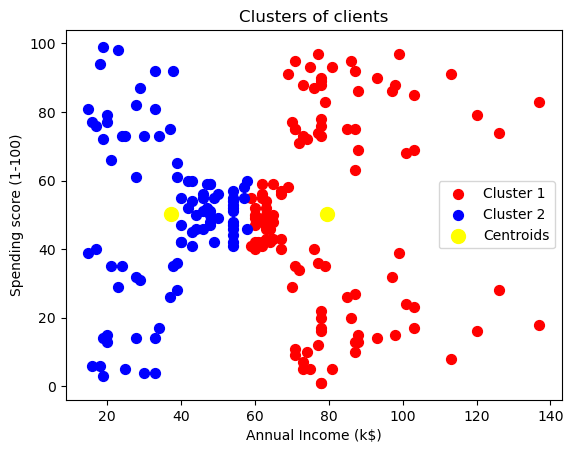

In [8]:
# Visualising the clusters

plt.scatter(X[Y_Kmeans == 0, 0], X[Y_Kmeans == 0,1],s = 50, c='red', label = 'Cluster 1')

plt.scatter(X[Y_Kmeans == 1, 0], X[Y_Kmeans == 1,1],s = 50, c='blue', label = 'Cluster 2')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()

# **VISUALIZATION**

**Elbow Method for Optimal K**

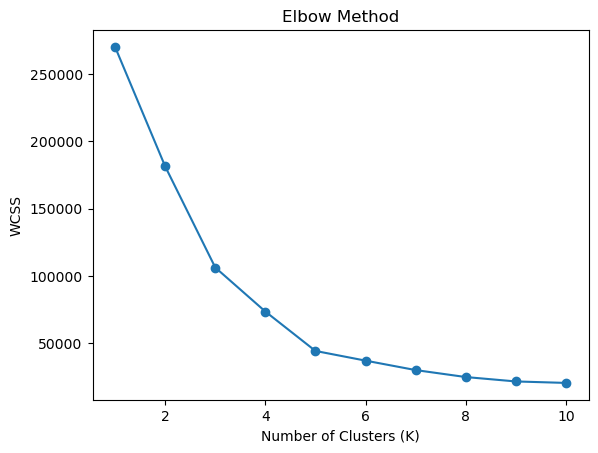

In [17]:
from sklearn.cluster import KMeans
wcss = []

# Calculate wcss
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()




**Visualizing Clusters with Plotly Express**

In [25]:
# Choose optimal K based on Elbow Method (e.g., K=2)
optimal_k = 2

# Applying KMeans to the dataset with the optimal number of clusters
kmeans = KMeans(init='k-means++', max_iter=300, n_init=10, random_state=0, n_clusters=optimal_k)
Y_Kmeans = kmeans.fit_predict(X)

import plotly.express as px

# Visualize the clusters using interactive Plotly Express
fig = px.scatter(dataset, x='Annual Income (k$)', y='Spending Score (1-100)', color=Y_Kmeans,
                 labels={'color': 'Cluster'}, title='Clusters of clients', hover_name='CustomerID')
fig.show()





**Evaluation and Dimensionality Reduction**

In [26]:
sil_score = silhouette_score(X, Y_Kmeans)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.2968969162503008


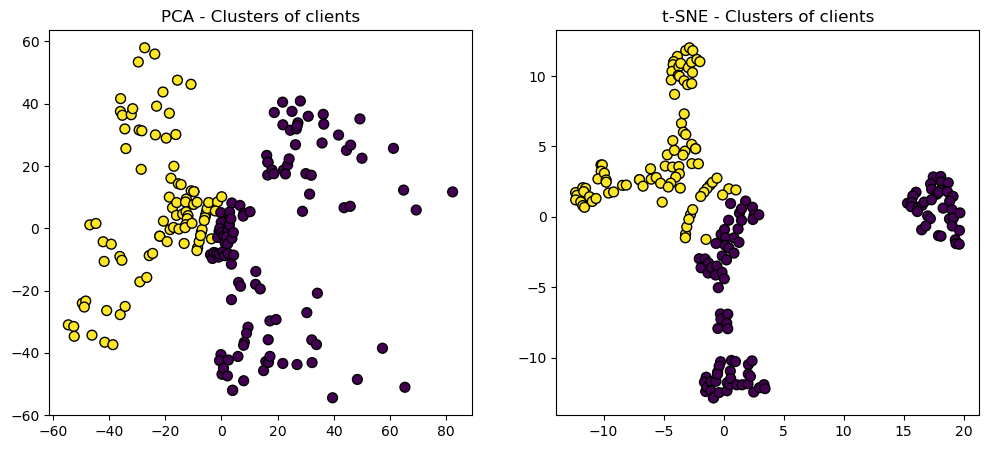

In [27]:
# Dimensionality reduction for visualization
pca = PCA(n_components=2)
tsne = TSNE(n_components=2, random_state=0)

X_pca = pca.fit_transform(X)
X_tsne = tsne.fit_transform(X)

# Visualize clustered data in 2D using PCA and t-SNE
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y_Kmeans, cmap='viridis', edgecolors='k', s=50)
plt.title('PCA - Clusters of clients')
plt.subplot(122)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y_Kmeans, cmap='viridis', edgecolors='k', s=50)
plt.title('t-SNE - Clusters of clients')
plt.show()

# **FROM SCRATCH**

2


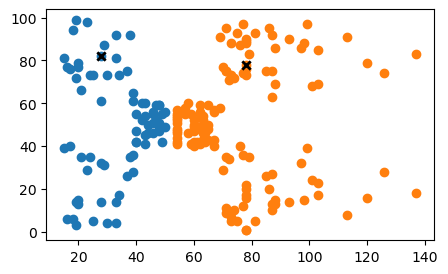

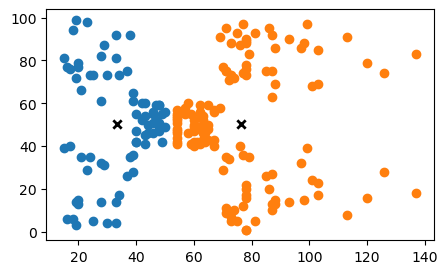

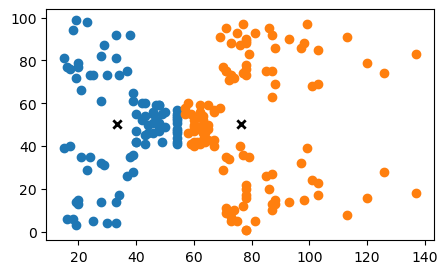

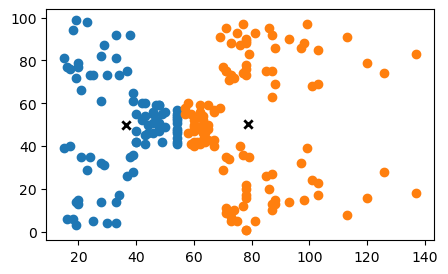

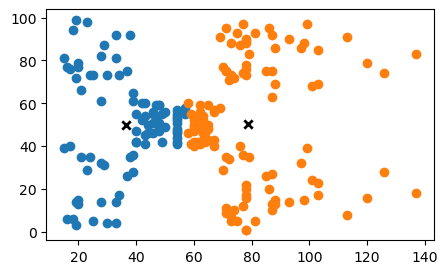

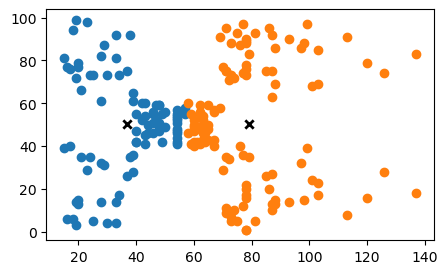

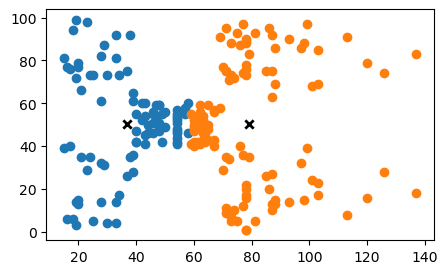

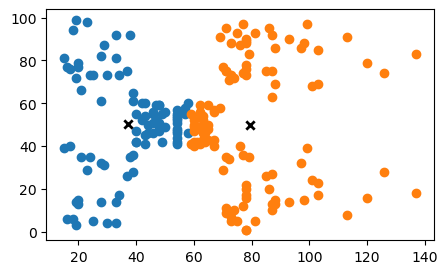

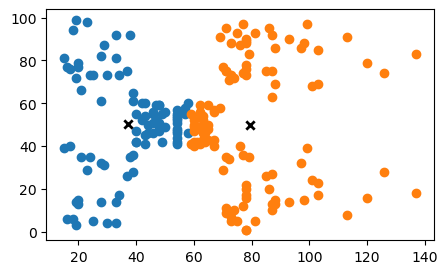

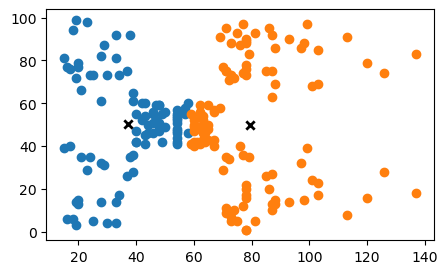

In [28]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KMeans:

    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]

        # the centers (mean vector) for each cluster
        self.centroids = []


    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # optimize clusters
        for _ in range(self.max_iters):
            # assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels


    def _create_clusters(self, centroids):
        # assign the samples to the closest centroids
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx


    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between old and new centroids, for all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(5, 3))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()


# Testing
if __name__ == "__main__":
    
    clusters = len(np.unique(y))
    print(clusters)

    kmeans=KMeans(K=clusters,max_iters=150, plot_steps=True)
    y_pred = kmeans.predict(X)

    kmeans.plot()